# Diabetes Cases prediction

Loading overview

In [116]:
import pandas as pd

diabetes= pd.read_csv("diabetes.csv")
print (diabetes.shape)
print ("--"*30)
print (diabetes.info())

(768, 9)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [117]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [120]:
# count the number of 0s in the column
num_zeros_glucose = (diabetes['Glucose'] == 0).sum()
num_zeros_bloodpressure = (diabetes['BloodPressure'] == 0).sum()
num_zeros_skinthickness = (diabetes['SkinThickness'] == 0).sum()
num_zeros_insulin = (diabetes['Insulin'] == 0).sum()
num_zeros_bmi = (diabetes['BMI'] == 0).sum()

# Print the number of zeros in each column
print("Number of zeros in Glucose column:", num_zeros_glucose)
print("Number of zeros in BloodPressure column:", num_zeros_bloodpressure)
print("Number of zeros in SkinThickness column:", num_zeros_skinthickness)
print("Number of zeros in Insulin column:", num_zeros_insulin)
print("Number of zeros in BMI column:", num_zeros_bmi)

Number of zeros in Glucose column: 5
Number of zeros in BloodPressure column: 35
Number of zeros in SkinThickness column: 227
Number of zeros in Insulin column: 374
Number of zeros in BMI column: 11


Implementing RF algorithm on unclean data

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    500
1    268
Name: Outcome, dtype: int64


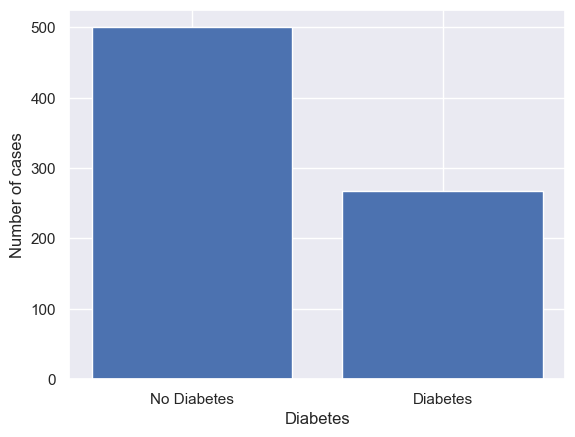

n_estimators: 1
Accuracy: 0.6753246753246753
F1 score: 0.5614035087719298
Runtime: 0.011959075927734375

n_estimators: 2
Accuracy: 0.6493506493506493
F1 score: 0.325
Runtime: 0.010786056518554688

n_estimators: 4
Accuracy: 0.7337662337662337
F1 score: 0.5591397849462365
Runtime: 0.012964248657226562

n_estimators: 8
Accuracy: 0.7337662337662337
F1 score: 0.6095238095238096
Runtime: 0.020685672760009766

n_estimators: 10
Accuracy: 0.7662337662337663
F1 score: 0.6785714285714286
Runtime: 0.02296304702758789

n_estimators: 12
Accuracy: 0.7532467532467533
F1 score: 0.6666666666666665
Runtime: 0.03081536293029785

n_estimators: 14
Accuracy: 0.7532467532467533
F1 score: 0.6545454545454545
Runtime: 0.031883955001831055

n_estimators: 16
Accuracy: 0.7402597402597403
F1 score: 0.6363636363636364
Runtime: 0.03424358367919922

n_estimators: 32
Accuracy: 0.7142857142857143
F1 score: 0.6
Runtime: 0.07110810279846191

n_estimators: 64
Accuracy: 0.7272727272727273
F1 score: 0.6181818181818182
Runtime

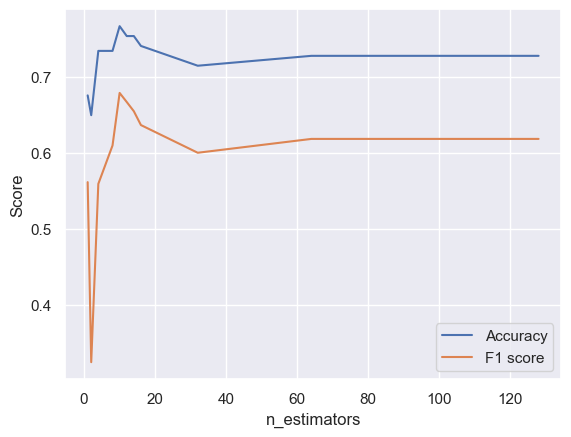

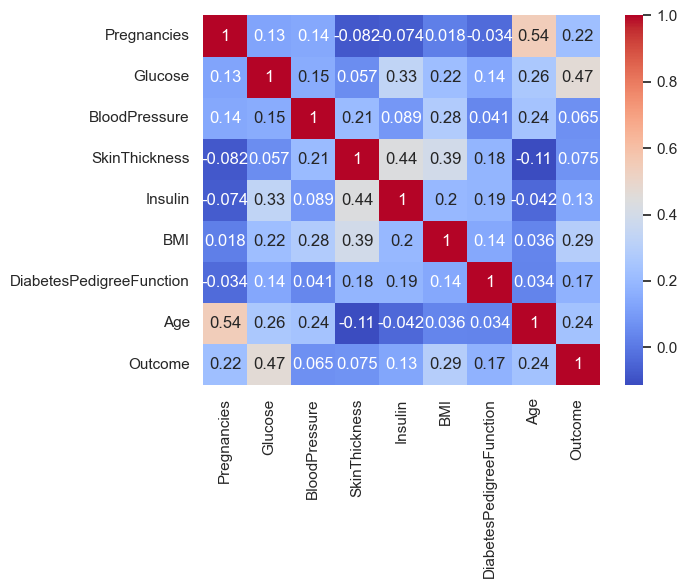

In [100]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the diabetes dataset
print(diabetes.head())


diabetes_counts = diabetes['Outcome'].value_counts()
print(diabetes_counts)

# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Specify a range of n_estimators values to evaluate
n_estimators_range = [1, 2, 4, 8,10,12,14, 16, 32, 64, 128]

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    
    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print the results and runtime
    end_time = time.time()
    print('n_estimators:', n_estimators)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, f1_scores, label='F1 score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


# Compute the correlation matrix
corr = diabetes.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Deleting some rows in data with 0 value and implementing RF algorithm again

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       44             62              0        0  25.0   
1            0       57             60              0        0  21.7   
2            9       57             80             37        0  32.8   
3            3       61             82             28        0  34.4   
4            7       62             78              0        0  32.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.587   36        0  
1                     0.735   67        0  
2                     0.096   41        0  
3                     0.243   46        0  
4                     0.391   41        0  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   724.000000  724.000000     724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552      21.443370   84.494475   
std       3.362803   30.750030      12.379870      15.732756  117.016513   

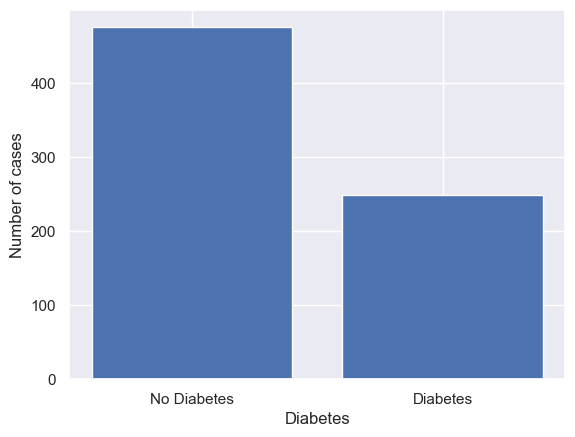

n_estimators: 1
Accuracy: 0.696551724137931
F1 score: 0.47619047619047616
Runtime: 0.007978439331054688

n_estimators: 2
Accuracy: 0.7379310344827587
F1 score: 0.44117647058823534
Runtime: 0.011386871337890625

n_estimators: 4
Accuracy: 0.7655172413793103
F1 score: 0.5
Runtime: 0.012996435165405273

n_estimators: 8
Accuracy: 0.7379310344827587
F1 score: 0.47222222222222215
Runtime: 0.018651485443115234

n_estimators: 10
Accuracy: 0.7448275862068966
F1 score: 0.4477611940298507
Runtime: 0.021914958953857422

n_estimators: 12
Accuracy: 0.7448275862068966
F1 score: 0.4931506849315069
Runtime: 0.02406144142150879

n_estimators: 14
Accuracy: 0.7517241379310344
F1 score: 0.5135135135135135
Runtime: 0.035613298416137695

n_estimators: 16
Accuracy: 0.7310344827586207
F1 score: 0.4507042253521127
Runtime: 0.033737897872924805

n_estimators: 32
Accuracy: 0.7379310344827587
F1 score: 0.4864864864864865
Runtime: 0.05929923057556152

n_estimators: 64
Accuracy: 0.7448275862068966
F1 score: 0.4931506

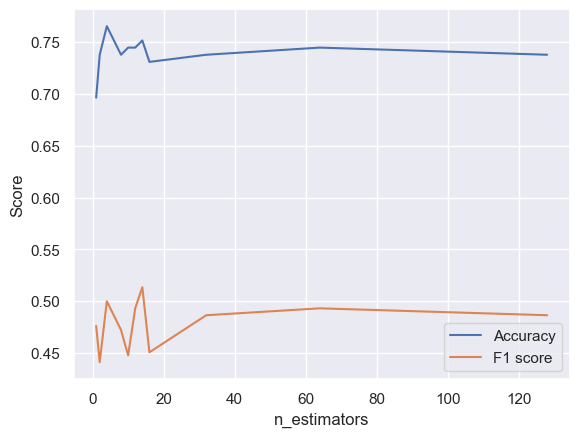

In [105]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the diabetes dataset
df = pd.read_csv('diabetes_clean.csv')

print(df.head())
print(df.describe())
diabetes_counts = df['Outcome'].value_counts()

# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

# Specify a range of n_estimators values to evaluate
n_estimators_range = [1, 2, 4, 8,10,12,14, 16, 32, 64, 128]

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    
    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print the results and runtime
    end_time = time.time()
    print('n_estimators:', n_estimators)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, f1_scores, label='F1 score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()

This time instead of deleting rows with some 0 values we replace all those values with the median

In [122]:
diabetes.loc[diabetes['Glucose'] == 0, 'Glucose'] = diabetes['Glucose'].median()
diabetes.loc[diabetes['BloodPressure'] == 0, 'BloodPressure'] = diabetes['BloodPressure'].median()
diabetes.loc[diabetes['Insulin'] == 0, 'Insulin'] = diabetes['Insulin'].median()
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = diabetes['BMI'].median()
diabetes.loc[diabetes['SkinThickness'] == 0, 'SkinThickness'] = diabetes['SkinThickness'].median()
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


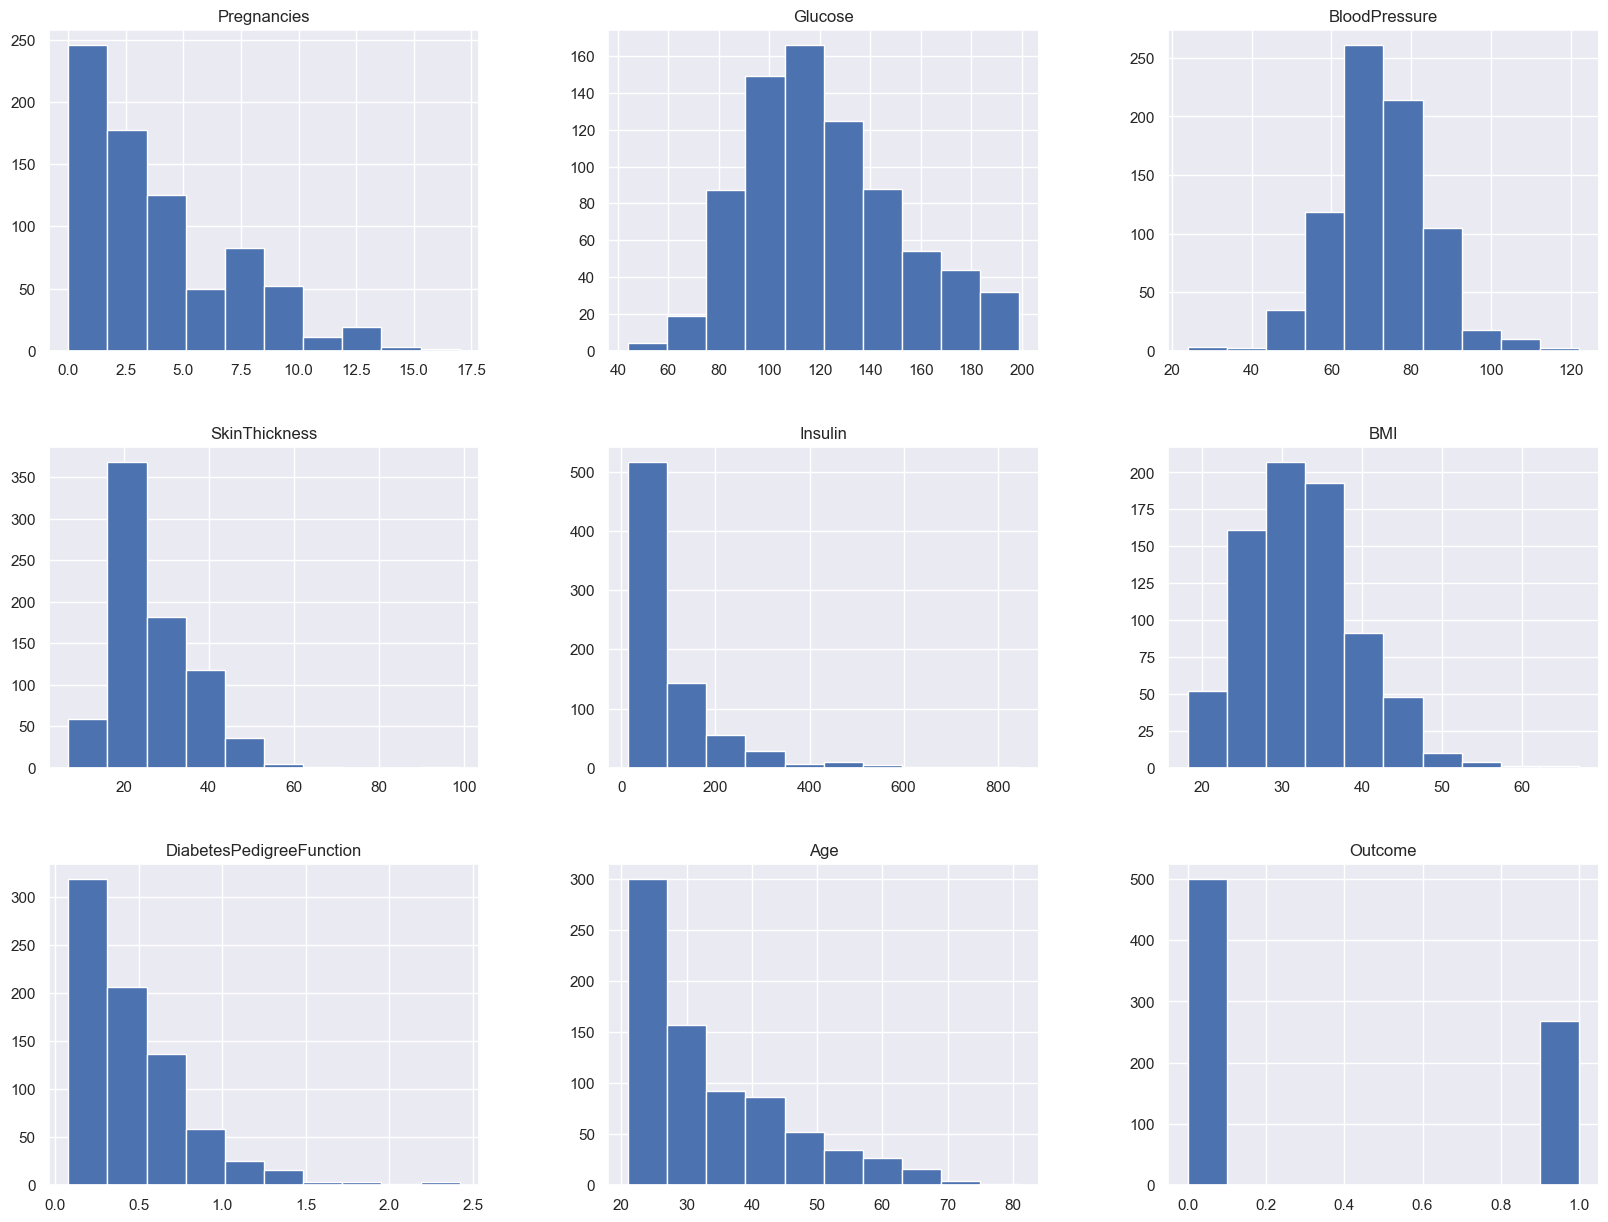

In [85]:
diabetes.hist(figsize = (20, 15))
plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    500
1    268
Name: Outcome, dtype: int64


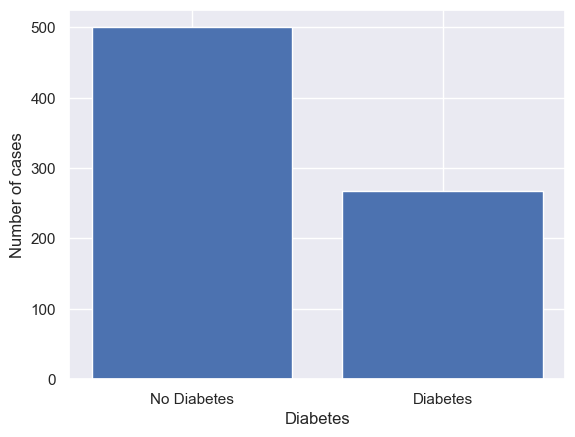

n_estimators: 1
Accuracy: 0.6883116883116883
F1 score: 0.5932203389830508
Runtime: 0.008022546768188477

n_estimators: 2
Accuracy: 0.7077922077922078
F1 score: 0.5161290322580645
Runtime: 0.015964031219482422

n_estimators: 4
Accuracy: 0.7402597402597403
F1 score: 0.5744680851063829
Runtime: 0.007994413375854492

n_estimators: 8
Accuracy: 0.7532467532467533
F1 score: 0.6199999999999999
Runtime: 0.02400946617126465

n_estimators: 10
Accuracy: 0.7532467532467533
F1 score: 0.6122448979591837
Runtime: 0.015988826751708984

n_estimators: 12
Accuracy: 0.7662337662337663
F1 score: 0.6538461538461539
Runtime: 0.03195381164550781

n_estimators: 14
Accuracy: 0.7532467532467533
F1 score: 0.6545454545454545
Runtime: 0.032003164291381836

n_estimators: 16
Accuracy: 0.7727272727272727
F1 score: 0.6902654867256638
Runtime: 0.03197741508483887

n_estimators: 32
Accuracy: 0.7662337662337663
F1 score: 0.689655172413793
Runtime: 0.06464910507202148

n_estimators: 64
Accuracy: 0.7727272727272727
F1 score:

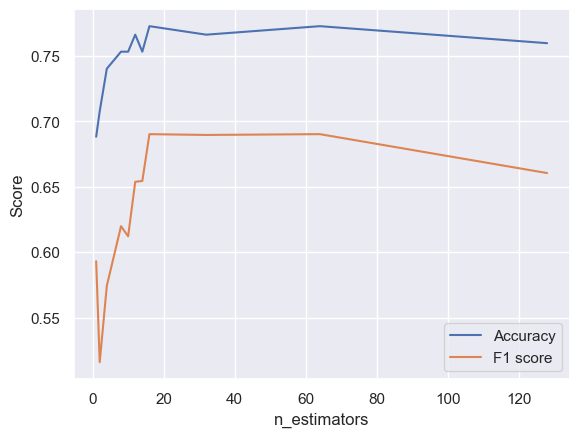

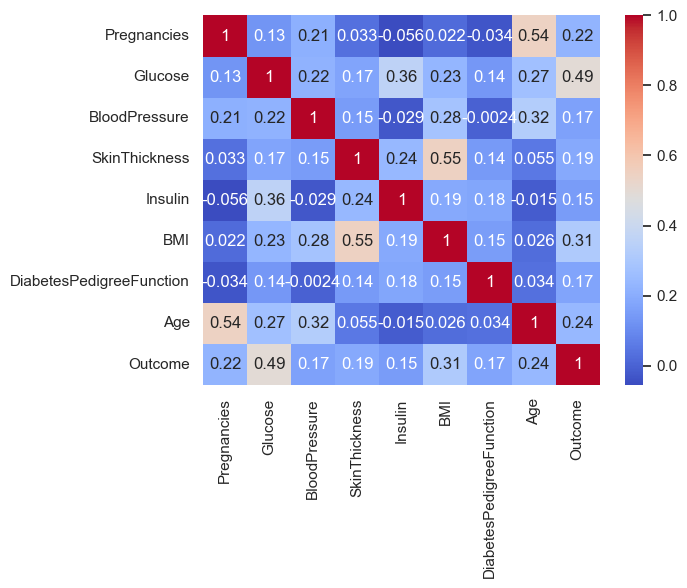

In [93]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the diabetes dataset
print(diabetes.head())


diabetes_counts = diabetes['Outcome'].value_counts()
print(diabetes_counts)

# Create a bar plot of diabetes cases
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Number of cases')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)

# Specify a range of n_estimators values to evaluate
n_estimators_range = [1, 2, 4, 8,10,12,14, 16, 32, 64, 128]

# Initialize lists to store the accuracy and F1 scores
accuracy_scores = []
f1_scores = []

# Evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    
    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the accuracy and F1 scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print the results and runtime
    end_time = time.time()
    print('n_estimators:', n_estimators)
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('Runtime:', end_time - start_time)
    print('')

# Plot the results
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, f1_scores, label='F1 score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


# Compute the correlation matrix
corr = diabetes.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()